#### CMSE 202 Final Project
### &#9989; Griffin Frendo, Ian Byram, Ty Buckley, Yoel Garcia 
### &#9989; Section 002
#### &#9989; 4/26/21

# Background/Motivation

The legalization and decriminalization of drugs is a very tense and debated topic in today's society. Such a law passed will have major impacts for society, some very good, some bad. Through this project we want to explore some impacts that have already occurred on countries, states and communities across the world.

One of the most debated drugs is marijuana. Across the USA, marijuana completely illegal in only 6 states. In 16 out of 50 states marijuana is completely legal. The other 28 states have either decriminalized or made medical marijuana legal (or a combination of both).  Whether you're in favor, not in favor, or somewhere in between, change is happening. 

The United States is not the only country in the world that has legalized or decriminalized drugs. Therefore we want to look around the world at these trends as well. We will not only focus on marijuana, but other drugs or all drugs.



# Questions, Changes and Difficulties:


The original topic question: How legalization of drug decreases crime.

At first we wanted to expand on this topic. The reason why we wanted to expand on this topic was because the legalization/decriminalization of drugs has a much broader impact than just crime therefore to get a larger understanding of its impact we wanted to look at other metrics as well.
The next question was: How does the legalization/decriminalization impact society in terms of crime, overdoses and HIV rates?

Unfortunately we were not able to do this question either. There was just no data on HIV/overdose rates in states/countries where the legalization/decriminalization of drugs has occurred. 

**Overall final question**: How has the legalization/decriminalization of drugs impacted crime?

# Approach

We plan to break this project into two different parts. Part one will be: Crime, California and the legalization of marijuana. For this part of the project we plan on looking at total crimes before and after the legalization of marijuana which occurred in 2016. Our computational method was multiple regression. The predictors for total crime we will use are unemployment rates, income, various population metrics, marriage rates and poverty rates. Using crime numbers before the legalization, we will try to predict the number of crimes after legalization and compare it to the actual number of crimes that occured. This will be done to see if any change in the number of crimes can be attributed to changes in the variables we will be looking at, or if the change is the result of something else, for example the legalization of marijuana.

Part two will be looking at homicide rates of countries that have legalized/decriminalized all drugs. We will not be using a computational method in this part. Performing a computational method would be nearly impossible because predictor data simply does not exist for most of these countries and with the time constraints on the project we determined that it is out of the reach of possibility. In its place we will be using visualization analysis of the before and after of the legalized/decriminalized of drugs.


# Data Used

**Part 1:** 

*Target  Data*

State of California Department of Justice: Includes the years 2010-2019 with the type of crime committed and a count of how many times it was committed.

*Predictors Data*

California Income : Median income per household from the year 1984 to the year 2019

California Unemployment Statistics: Unemployment rate by year from 1990 to 2019 for all counties in California.

California Marriage rate: California Marriage rate from 1999 to 2019

California Age Data: Population of people ages 0-17 from 2000 to 2019

California Population - Total california population from the year 1900 to the year 2020.

California Population Density: Population Density for California from 1995 to 2019

California Poverty Rate: Estimated California Poverty rate from 1989 to 2019

**Part 2:**

Country Homicides- Includes number of homicides from each year starting in 1990 going to 2018. 


# Methodology

## Part 1: Crime, California and the legalization of marijuana

### Cleaning Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.api as sm


In [3]:
# Reading in California crime data for 2000-2009 and 2010-2019
cali_crime_00_09 = pd.read_csv("State of California Department of Justice 00-09 - OpenJustice.csv")
cali_crime_10_19 = pd.read_csv("State of California Department of Justice 10-19 - OpenJustice.csv")

# Joining the two California crime data frames to create a dataframe for the years 2000-2019
cali_crime_00_19 = cali_crime_00_09.join(cali_crime_10_19,lsuffix="Type of Crime")
cali_crime_00_19.rename(columns={cali_crime_00_19.columns[0]:"Type of Crime"},inplace=True)
cali_crime_00_19.drop(columns=cali_crime_00_19.columns[11],inplace=True)
cali_crime_00_19.head() #First Five rows

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Crimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Violent Crimes,"210,492","210,510","207,988","204,591","197,432","189,593","194,128","191,493","185,233",...,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"
2,Homicide,"2,074","2,201","2,392","2,402","2,394","2,503","2,483","2,258","2,143",...,"1,809","1,794","1,878","1,745","1,697","1,861","1,930","1,829","1,739","1,679"
3,Rape (Forcible Rape prior to 2014),"9,785","9,882","10,176","9,918","9,598","9,345","9,213","9,047","8,906",...,"8,325","7,678","7,828","7,459","9,397","12,793","13,695","14,724","15,500","14,720"
4,Rape,"8,197","8,219","8,620","8,461","8,287","8,115","7,937","7,931","7,859",...,"7,408","6,792","6,935","6,665","8,562","11,827","12,785","13,799","14,526","13,791"


In [4]:
# Dropping the first blank row from the dataframe
cali_crime_00_19.drop(0,inplace=True)
cali_crime_00_19.reset_index(drop=True, inplace=True)
cali_crime_00_19.head()

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Violent Crimes,"210,492","210,510","207,988","204,591","197,432","189,593","194,128","191,493","185,233",...,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"
1,Homicide,"2,074","2,201","2,392","2,402","2,394","2,503","2,483","2,258","2,143",...,"1,809","1,794","1,878","1,745","1,697","1,861","1,930","1,829","1,739","1,679"
2,Rape (Forcible Rape prior to 2014),"9,785","9,882","10,176","9,918","9,598","9,345","9,213","9,047","8,906",...,"8,325","7,678","7,828","7,459","9,397","12,793","13,695","14,724","15,500","14,720"
3,Rape,"8,197","8,219","8,620","8,461","8,287","8,115","7,937","7,931","7,859",...,"7,408","6,792","6,935","6,665","8,562","11,827","12,785","13,799","14,526","13,791"
4,Attempted Rape,"1,588","1,663","1,556","1,457","1,311","1,230","1,276","1,116","1,047",...,917,886,893,794,835,966,910,925,974,929


In [5]:
# Selecting the "Violent Crime" and "Property Crime" rows
cali_crime_00_19 = cali_crime_00_19.iloc[[0,25]]
cali_crime_00_19.reset_index(drop=True, inplace=True)
cali_crime_00_19.head()

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Violent Crimes,"210,492","210,510","207,988","204,591","197,432","189,593","194,128","191,493","185,233",...,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"
1,Property Crimes,"1,054,860","1,120,487","1,171,644","1,209,030","1,223,275","1,195,381","1,156,010","1,112,366","1,081,272",...,"981,523","974,666","1,048,764","1,018,333","946,682","1,023,828","1,001,380","986,769","940,998","915,197"


In [6]:
cali_crime_00_19.dtypes

Type of Crime    object
2000             object
2001             object
2002             object
2003             object
2004             object
2005             object
2006             object
2007             object
2008             object
2009             object
2010             object
2011             object
2012             object
2013             object
2014             object
2015             object
2016             object
2017             object
2018             object
2019             object
dtype: object

In [7]:
cali_crime_00_19.replace(",", '', regex=True, inplace=True) # removing the commas in the numerical data

In [8]:
# Dictionary to convert the data for each column to an integer
intconvert = {"2000":int,
              "2001":int,
              "2002":int,
              "2003":int,
              "2004":int,
              "2005":int,
              "2006":int,
              "2007":int,
              "2008":int,
              "2009":int,
              "2010":int,
              "2011": int,
              "2012": int,
              "2013": int,
              "2014":int,
              "2015":int,
              "2016":int,
              "2017":int,
              "2018":int,
              "2019":int}

In [9]:
cali_crime_00_19 = cali_crime_00_19.astype(intconvert) # converting the data to integers

In [10]:
cali_crime_00_19.dtypes

Type of Crime    object
2000              int64
2001              int64
2002              int64
2003              int64
2004              int64
2005              int64
2006              int64
2007              int64
2008              int64
2009              int64
2010              int64
2011              int64
2012              int64
2013              int64
2014              int64
2015              int64
2016              int64
2017              int64
2018              int64
2019              int64
dtype: object

### Type of Crime

In [11]:
# Selecting the years 2000-2016 for the data before legalization
cali_crime_pre_2016 = cali_crime_00_19[[ 'Type of Crime',"2000","2001","2002","2003","2004","2005","2006","2007","2008",
                                         "2009","2010","2011", "2012", "2013", "2014", "2015", "2016"]]

cali_crime_pre_2016 #Leagalization occured in 2016, after election results were certified

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Violent Crimes,210492,210510,207988,204591,197432,189593,194128,191493,185233,174579,163957,155313,160629,151634,151425,166588,174701
1,Property Crimes,1054860,1120487,1171644,1209030,1223275,1195381,1156010,1112366,1081272,1006788,981523,974666,1048764,1018333,946682,1023828,1001380


In [12]:
# Selecting the years 2017-2019 for the data after legalization
cali_crime_post_2016 = cali_crime_00_19[[ "Type of Crime","2017", "2018", "2019"]]

cali_crime_post_2016

,Type of Crime,2017,2018,2019
0,Violent Crimes,178553,176866,173205
1,Property Crimes,986769,940998,915197


In [13]:
# Creating a column for the mean crimes of each type for the years before legalization
cali_crime_pre_2016["mean"] = cali_crime_pre_2016.mean(axis=1)
cali_crime_pre_2016

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,mean
0,Violent Crimes,210492,210510,207988,204591,197432,189593,194128,191493,185233,174579,163957,155313,160629,151634,151425,166588,174701,1.817815e+05
1,Property Crimes,1054860,1120487,1171644,1209030,1223275,1195381,1156010,1112366,1081272,1006788,981523,974666,1048764,1018333,946682,1023828,1001380,1.078017e+06


In [14]:
# Creating a column for the mean crimes of each type for the years after legalization
cali_crime_post_2016["mean"] = cali_crime_post_2016.mean(axis=1)
cali_crime_post_2016

,Type of Crime,2017,2018,2019,mean
0,Violent Crimes,178553,176866,173205,176208.000000
1,Property Crimes,986769,940998,915197,947654.666667


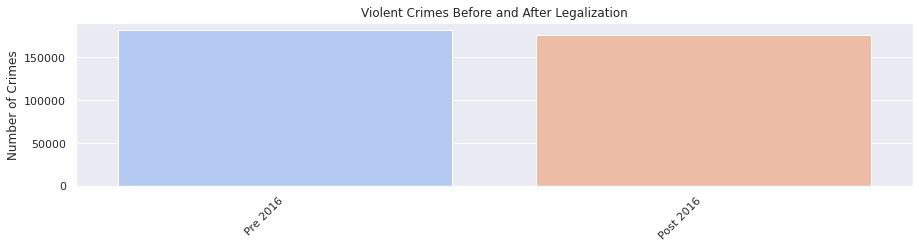

In [15]:
# Plotting the average number of violent crimes for the years before and the years after legalization
sns.set_theme() # Set the theme to seaborn
plt.figure(figsize=(15,3))
ax = sns.barplot(["Pre 2016", "Post 2016"], [cali_crime_pre_2016["mean"][0],cali_crime_post_2016["mean"][0]],palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Violent Crimes Before and After Legalization")
plt.ylabel("Number of Crimes")
plt.show()

**Figure 1:** The number of violent crimes in California before and after the legalization of marijuana

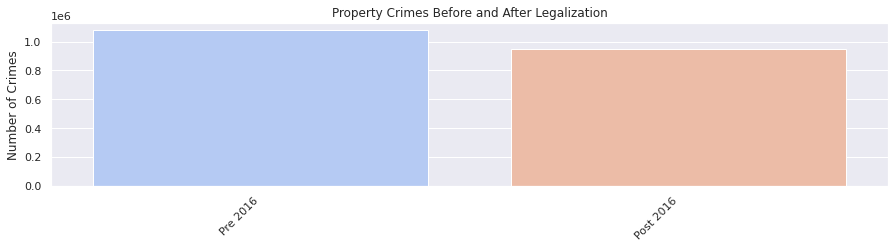

In [16]:
# Plotting the average number of property crimes for the years before and the years after legalization
plt.figure(figsize=(15,3))
ax = sns.barplot(["Pre 2016", "Post 2016"], [cali_crime_pre_2016["mean"][1],cali_crime_post_2016["mean"][1]],palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Property Crimes Before and After Legalization")
plt.ylabel("Number of Crimes")
plt.show()

**Figure 2:** The number of property crimes in California before and after the legalization of marijuana

## Crime By Year

In [17]:
# Making a dataframe that has the years as rows and the type of crime as columns
cali_crime_00_19_by_year = cali_crime_00_19.transpose()

In [18]:
cali_crime_00_19_by_year.drop("Type of Crime", inplace=True)
cali_crime_00_19_by_year = cali_crime_00_19_by_year.astype('int') # Converting the data in the dataframe to integers
cali_crime_00_19_by_year.reset_index(inplace=True) # Making the years a column instead of the index
cali_crime_00_19_by_year.head()

,index,0,1
0,2000,210492,1054860
1,2001,210510,1120487
2,2002,207988,1171644
3,2003,204591,1209030
4,2004,197432,1223275


In [19]:
cali_crime_00_19_by_year.columns = ["Year", "Violent Crimes", "Property Crimes"] # Changing the column names
cali_crime_00_19_by_year.head()

,Year,Violent Crimes,Property Crimes
0,2000,210492,1054860
1,2001,210510,1120487
2,2002,207988,1171644
3,2003,204591,1209030
4,2004,197432,1223275


In [20]:
# Creating a column for the total number of property and violent crimes each year
cali_crime_00_19_by_year["total"] = cali_crime_00_19_by_year.iloc[:,1:].sum(axis=1)
cali_crime_00_19_by_year.head()

,Year,Violent Crimes,Property Crimes,total
0,2000,210492,1054860,1265352
1,2001,210510,1120487,1330997
2,2002,207988,1171644,1379632
3,2003,204591,1209030,1413621
4,2004,197432,1223275,1420707


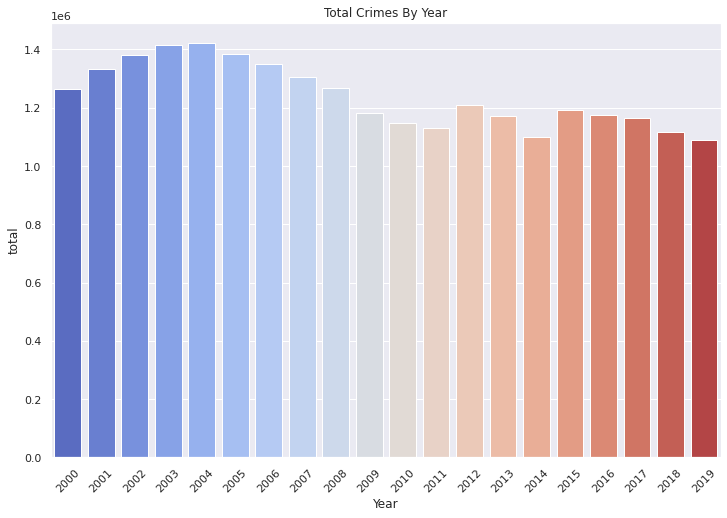

In [21]:
# Plotting the total number of crimes for each year
plt.figure(figsize=(12,8))
sns.barplot(x = cali_crime_00_19_by_year["Year"], y = cali_crime_00_19_by_year["total"], palette="coolwarm")
plt.title("Total Crimes By Year")
plt.xticks(rotation=45)
plt.show()

**Figure 3:** The total number crimes in California from 2000-2019

In [22]:
# Reading in and cleaning California income data for 2000-2019
cali_income = pd.read_csv("california_income.csv",names=["Date","Median Income"],header=1)
cali_income_00_19 = cali_income[15:]
cali_income_00_19.reset_index(drop=True,inplace=True)
cali_income_00_19.head()

,Date,Median Income
0,2000-01-01,46816
1,2001-01-01,47262
2,2002-01-01,47437
3,2003-01-01,49300
4,2004-01-01,49222


In [23]:
# Reading in and cleaning California population data for 2000-2019
cali_population = pd.read_csv("california-population.csv",header=9)
cali_population_00_19 = cali_population[100:120]
cali_population_00_19.reset_index(drop=True,inplace=True)
cali_population_00_19.head()

,date,Population,Annual Change
0,2000-12-01,33987977,2.54
1,2001-12-01,34479458,1.45
2,2002-12-01,34871843,1.14
3,2003-12-01,35253159,1.09
4,2004-12-01,35574576,0.91


In [24]:
# Reading in unemployment data
cali_unemployment = pd.read_csv("California_Unemployment_Statistics.csv")

# Masking the data to only look at california data
cali_unemployment_mask = cali_unemployment["Area Name"] == "California"
cali_unemployment = cali_unemployment[cali_unemployment_mask]

# Making a dataframe for the years 2000-2019
cali_unemployment.reset_index(drop=True,inplace=True)
cali_unemployment_00_19 = cali_unemployment[10:]
cali_unemployment_00_19.reset_index(drop=True,inplace=True)

cali_unemployment_00_19.head()

,Area Type,Area Name,Year,Period,Labor Force,Employment,Unemployment,Unemployment Rate,Seasonally Adjusted (Y N),Status
0,State,California,2000,Annual,16867800,16033200,834600,4.9,N,Final
1,State,California,2001,Annual,17128400,16197700,930800,5.4,N,Final
2,State,California,2002,Annual,17257100,16108700,1148400,6.7,N,Final
3,State,California,2003,Annual,17277600,16102800,1174800,6.8,N,Final
4,State,California,2004,Annual,17383600,16304000,1079600,6.2,N,Final


In [25]:
# Reading in and cleaning state marriage rate data
marriage_rates = pd.read_csv("state-marriage-rates-90-95-99-19.csv",header=5)
marriage_rates.drop(columns=["Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27","Unnamed: 28","Unnamed: 29"],inplace=True)
marriage_rates.drop(index=0,inplace=True)
marriage_rates.rename(columns={"Unnamed: 0" : "State"},inplace=True)

# Only looking at the California marriage rate data
cali_marriage_rates = marriage_rates.iloc[4]
cali_marriage_rates.drop(index="State",inplace=True)

cali_marriage_rates = cali_marriage_rates.astype('float64') # converting the data to floats

# Making a datframe of the marriage rates from 2000-2019
cali_marriage_rates = cali_marriage_rates[["2000","2001","2002","2003","2004","2005","2006","2007","2008",
                                           "2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]]
cali_marriage_rates.index = np.arange(20)

cali_marriage_rates.head()

0    5.8
1    6.5
2    6.2
3    6.1
4    6.4
Name: 5, dtype: float64

In [26]:
# Reading in and cleaning data of the number of children in California
cali_age_data = pd.read_csv("california_child_population.csv")
cali_age_data["Data"].replace(',','',regex=True,inplace=True)
cali_age_data["Data"] = cali_age_data["Data"].astype('float64')

# Making a column for the percentage of the total California population that the youth make up
cali_age_data["Percentage of Total Population"] = cali_age_data["Data"] / cali_population_00_19[" Population"]
cali_age_data.head()

,FIPSCode,LocationType,Location,AgeGroup,Gender,TimeFrame,DataFormat,Data,Percentage of Total Population
0,6,State,California,Total for Ages 0_17,Total,2000,Number,9226715.0,0.271470
1,6,State,California,Total for Ages 0_17,Total,2001,Number,9351040.0,0.271206
2,6,State,California,Total for Ages 0_17,Total,2002,Number,9439641.0,0.270695
3,6,State,California,Total for Ages 0_17,Total,2003,Number,9522125.0,0.270107
4,6,State,California,Total for Ages 0_17,Total,2004,Number,9559942.0,0.268730


In [27]:
# Reading in and cleaning California population density data
cali_pop_density = pd.read_csv("California - Population density.csv")
cali_pop_density_by_year = cali_pop_density.transpose()
cali_pop_density_by_year.reset_index(inplace=True)
cali_pop_density_by_year.drop(index=np.arange(6), inplace=True)
cali_pop_density_by_year.columns = ["Year", "Population Density"]
cali_pop_density_00_19 = cali_pop_density_by_year[5:]
cali_pop_density_00_19.reset_index(drop=True,inplace=True)
cali_pop_density_00_19["Population Density"] = cali_pop_density_00_19["Population Density"].astype('float64')
cali_pop_density_00_19.head()

,Year,Population Density
0,2000,84.14
1,2001,85.36
2,2002,86.33
3,2003,87.27
4,2004,88.07


In [28]:
# Reading in and cleaning California poverty rate data
cali_poverty_rates = pd.read_csv("California - Estimated Percent of People of All Ages in Poverty, NSA.csv")
cali_poverty_rates_by_year = cali_poverty_rates.transpose()
cali_poverty_rates_by_year.reset_index(inplace=True)
cali_poverty_rates_by_year.drop(index=np.arange(3), inplace=True)
cali_poverty_rates_by_year.columns = ["Year", "Poverty Rate"]
cali_poverty_rates_00_19 = cali_poverty_rates_by_year[7:]
cali_poverty_rates_00_19.reset_index(drop=True, inplace=True)
cali_poverty_rates_00_19["Poverty Rate"] = cali_poverty_rates_00_19["Poverty Rate"].astype('float64')
cali_poverty_rates_00_19.head()

,Year,Poverty Rate
0,2000,12.7
1,2001,12.9
2,2002,13.3
3,2003,13.7
4,2004,13.2


In [29]:
# Making a dataframe for the different variables that will be used to create and fit a model for the number
# of crimes. The data used to create the model is from the years before legalization, 2000-2016.
explanatory_vars = pd.DataFrame({"Income": cali_income_00_19[:17]["Median Income"],
                                 "Unemployment": cali_unemployment_00_19[:17]["Unemployment Rate"],
                                 "Marriage Rate": cali_marriage_rates[:17],
                                 "Youth Concentration": cali_age_data[:17]["Percentage of Total Population"],
                                 "Population": cali_population_00_19[:17][" Population"],
                                 "Population Change": cali_population_00_19[:17][" Annual Change"],
                                 "Population Density": cali_pop_density_00_19[:17]["Population Density"],
                                 "Poverty Rate": cali_poverty_rates_00_19[:17]["Poverty Rate"]})

explanatory_vars.head()

,Income,Unemployment,Marriage Rate,Youth Concentration,Population,Population Change,Population Density,Poverty Rate
0,46816,4.9,5.8,0.271470,33987977,2.54,84.14,12.7
1,47262,5.4,6.5,0.271206,34479458,1.45,85.36,12.9
2,47437,6.7,6.2,0.270695,34871843,1.14,86.33,13.3
3,49300,6.8,6.1,0.270107,35253159,1.09,87.27,13.7
4,49222,6.2,6.4,0.268730,35574576,0.91,88.07,13.2


In [30]:
# Making a dataframe for the different variables that will be used to predict the number of crimes for the
# years after legalization. The data used to predict is from the years 2017-2019.
predicting_vars = pd.DataFrame({"Income": cali_income_00_19[17:]["Median Income"],
                                "Unemployment": cali_unemployment_00_19[17:]["Unemployment Rate"],
                                "Marriage Rate": cali_marriage_rates[17:],
                                "Youth Concentration": cali_age_data[17:]["Percentage of Total Population"],
                                "Population": cali_population_00_19[17:][" Population"],
                                "Population Change": cali_population_00_19[17:][" Annual Change"],
                                "Population Density": cali_pop_density_00_19[17:]["Population Density"],
                                "Poverty Rate": cali_poverty_rates_00_19[17:]["Poverty Rate"]})

predicting_vars.head()

,Income,Unemployment,Marriage Rate,Youth Concentration,Population,Population Change,Population Density,Poverty Rate
17,70038,4.8,6.3,0.232614,39337785,0.48,97.44,13.3
18,70489,4.3,6.0,0.231106,39437463,0.25,97.69,12.8
19,78105,4.0,5.7,0.229772,39437610,0.00,97.82,11.8


In [31]:
# Creating and fitting the initial model for property crimes using all the explanatory variables
property_model = sm.OLS(cali_crime_00_19_by_year[:17]["Property Crimes"],explanatory_vars)
property_results = property_model.fit()

# Printing the summary of the model's results
print(property_results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Property Crimes   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1795.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                    1.72e-13
Time:                        14:41:54   Log-Likelihood:                         -197.63
No. Observations:                  17   AIC:                                      411.3
Df Residuals:                       9   BIC:                                      417.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [32]:
# Creating and fitting a new model for property crimes that uses fewer explanatory variables 
new_property_model = sm.OLS(cali_crime_00_19_by_year[:17]["Property Crimes"],
                            explanatory_vars[["Unemployment","Youth Concentration","Population Change"]])

new_property_results = new_property_model.fit()

# Printing the summary of the new model's results
print(new_property_results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Property Crimes   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              4537.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                    3.80e-21
Time:                        14:41:54   Log-Likelihood:                         -201.83
No. Observations:                  17   AIC:                                      409.7
Df Residuals:                      14   BIC:                                      412.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [33]:
# Predicting the number of property crimes for the years after legalization by using 
# the reduced variable property crime model.
predicted_property = new_property_results.predict(predicting_vars[["Unemployment","Youth Concentration","Population Change"]])

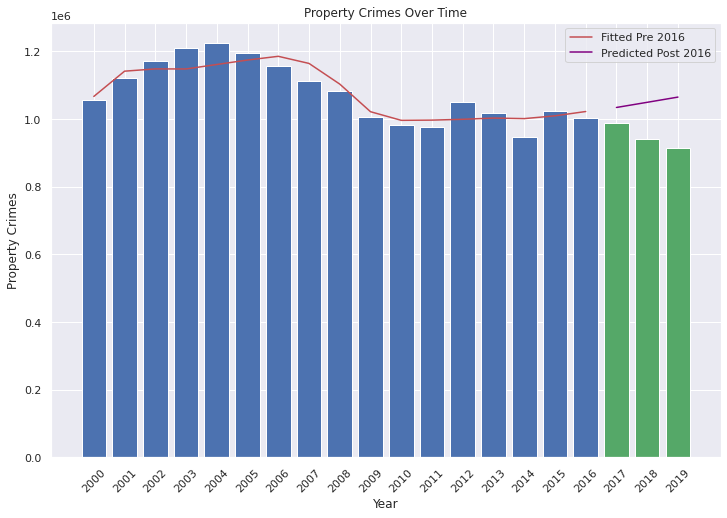

In [34]:
# Plotting the actual property crime totals for the years before legalization and the fitted line based on the model
plt.figure(figsize=(12,8))
plt.plot(cali_crime_00_19_by_year[:17]['Year'],new_property_results.predict(),label="Fitted Pre 2016",color="r")
plt.bar(cali_crime_00_19_by_year[:17]['Year'],cali_crime_00_19_by_year[:17]['Property Crimes'],color='b')

# Plotting the actual property crime totals for the years after legalization and the predicted line
plt.plot(cali_crime_00_19_by_year[17:]['Year'],predicted_property,label="Predicted Post 2016",color='purple')
plt.bar(cali_crime_00_19_by_year[17:]['Year'],cali_crime_00_19_by_year[17:]['Property Crimes'],color="g")

plt.title("Property Crimes Over Time")
plt.xlabel("Year")
plt.ylabel("Property Crimes")
plt.xticks(rotation=45)
plt.legend()

**Figure 4:** The number of property crimes in California along with a fitted and predicted curve for 2000-2019

In [35]:
# Creating and fitting the initial model for violent crimes using all the explanatory variables
violent_model = sm.OLS(cali_crime_00_19_by_year[:17]["Violent Crimes"],explanatory_vars)
violent_results = violent_model.fit()

# Printing the summary of the model's results
print(violent_results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Violent Crimes   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              5025.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                    1.68e-15
Time:                        14:41:55   Log-Likelihood:                         -158.67
No. Observations:                  17   AIC:                                      333.3
Df Residuals:                       9   BIC:                                      340.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [36]:
# Creating and fitting a new model for property crimes that uses fewer explanatory variables 
new_violent_model = sm.OLS(cali_crime_00_19_by_year[:17]["Violent Crimes"],
                           explanatory_vars[["Unemployment","Poverty Rate","Youth Concentration"]])

new_violent_results = new_violent_model.fit()

# Printing the summary of the new model's results
print(new_violent_results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Violent Crimes   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              4655.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                    3.17e-21
Time:                        14:41:55   Log-Likelihood:                         -171.40
No. Observations:                  17   AIC:                                      348.8
Df Residuals:                      14   BIC:                                      351.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [37]:
# Predicting the number of property crimes for the years after legalization by using 
# the reduced variable property crime model.
predicted_violent = new_violent_results.predict(predicting_vars[["Unemployment","Poverty Rate","Youth Concentration"]])

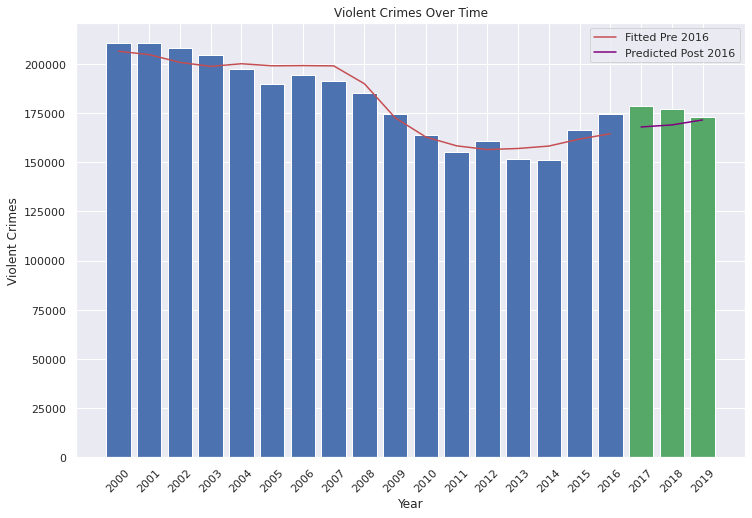

In [38]:
# Plotting the actual property crime totals for the years before legalization and the fitted line based on the model
plt.figure(figsize=(12,8))
plt.plot(cali_crime_00_19_by_year[:17]['Year'],new_violent_results.predict(),label="Fitted Pre 2016",color="r")
plt.bar(cali_crime_00_19_by_year[:17]['Year'],cali_crime_00_19_by_year[:17]['Violent Crimes'],color="b")

# Plotting the actual property crime totals for the years after legalization and the predicted line
plt.plot(cali_crime_00_19_by_year[17:]['Year'],predicted_violent,label="Predicted Post 2016",color="purple")
plt.bar(cali_crime_00_19_by_year[17:]['Year'],cali_crime_00_19_by_year[17:]['Violent Crimes'],color="g")

plt.title("Violent Crimes Over Time")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")
plt.xticks(rotation=45)
plt.legend()

**Figure 5:** The number of violent crimes in California along with a fitted and predicted curve for 2000-2019

# Part 2: Homicides and the Legalization of Drugs

## Cleaning Data

In [44]:
# Reading in and cleaning country homicide data
countries = pd.read_csv('CountriesHomicides.csv',header=4)
countries = countries.drop(columns = [str(i) for i in range(1960,1990)])
countries = countries.drop(columns = ["2019","2020"])
countries = countries.drop(columns = ["Country Code","Indicator Name"])
countries = countries.dropna().iloc[:-1,:]
countries.head()

,Country Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
8,Armenia,VC.IHR.PSRC.P5,5.030858,5.306328,8.859017,7.968812,4.781244,3.605453,3.598243,3.191746,...,3.358616,1.946260,2.468247,2.253627,2.174218,2.472185,2.563613,2.963067,2.377080,1.693916
11,Australia,VC.IHR.PSRC.P5,2.205111,1.977982,1.729668,1.891700,1.797902,1.978538,1.946202,1.979637,...,1.209148,1.042669,1.100364,1.060952,1.053541,1.029817,0.986107,0.935592,0.825720,0.891632
12,Austria,VC.IHR.PSRC.P5,1.152260,1.325151,1.238677,1.013673,1.107306,0.976206,1.234745,0.821624,...,0.609126,0.689660,0.887206,0.929168,0.724622,0.522332,0.530035,0.651629,0.793660,0.967229
19,Bulgaria,VC.IHR.PSRC.P5,2.567448,4.277404,5.324802,5.713591,5.805432,5.895477,5.282219,4.846682,...,2.007089,1.993263,1.734734,1.922551,1.495180,1.573358,1.750063,1.104594,1.450203,1.304667
23,Belarus,VC.IHR.PSRC.P5,5.004367,4.576418,5.849717,7.459202,8.201197,9.526072,9.656686,10.200419,...,5.162640,4.256640,3.961630,3.610474,3.533718,3.604848,3.453601,3.250177,2.539620,2.390873


In [45]:
# Creating a dictionary of countries that decriminalized drugs in some way and the year it happend
decriminalized = {'Armenia':2009,'Germany':2000,'Estonia':2002,'Croatia':2013,'Jamaica':2015,'Mexico':2009,'Poland':2017,'Portugal':2001,'Russian Federation':2004,'Switzerland':2012}
# List of countries that have always had decriminalization
already_decriminalized = ['Colombia','Italy','Netherlands','Spain']

## Visualization

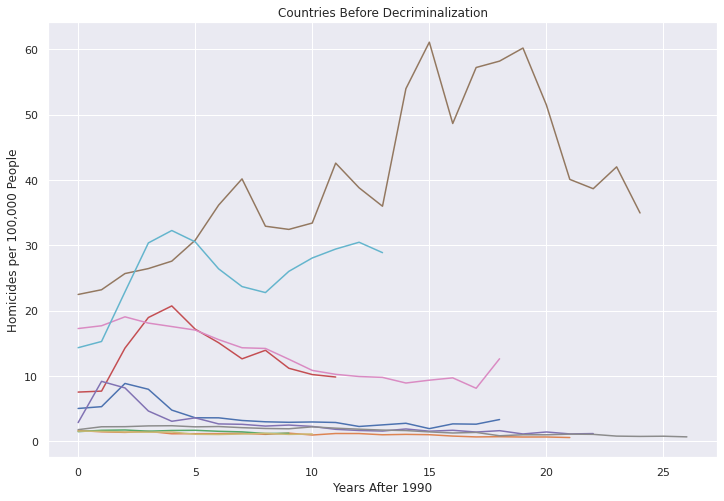

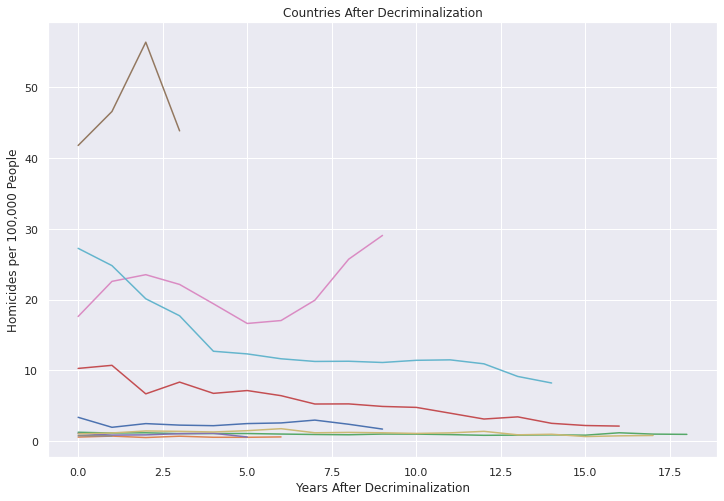

In [46]:
before= {} # Empty dictionary for the homicide rates before decriminalization
after = {} # Empty dictionary for the homicide rates after decriminalization

# Iterate through each row in the dataframe and check if the country is in the decriminalized dictionary.
# Then add its corresponding homicide data to the before and after dictionaries depending on its year of decriminalization
for row in countries.values:
    country = row[0]
    if country in decriminalized:
        year = 1988
        before[country] = row[1990-year:decriminalized[country]-year]
        after[country] = row[decriminalized[country]-year:2019-year]
        
# Iterate through the homicide data in the before and after dictionaries and plot them with appropriate formatting
plt.figure(figsize=(12,8))
for k,v in before.items():
    plt.plot(v)
plt.title("Countries Before Decriminalization")
plt.xlabel('Years After 1990')
plt.ylabel('Homicides per 100,000 People')
plt.show()

plt.figure(figsize=(12,8))
for k,v in after.items():
    plt.plot(v)
plt.xlabel('Years After Decriminalization')
plt.title("Countries After Decriminalization")
plt.ylabel('Homicides per 100,000 People')
plt.show()

**Figure 6:** The homicide rates for countries that have decriminalized drugs for the years before decriminalization <br>

**Figure 7:** The homicide rates for countries that have decriminalized drugs for the years after decriminalization

In [42]:
before_slopes = [] # Empty list for the slopes from before decriminalization

# Iterate through each country and its homicide data in the before decriminalization dictionary and perform
# a regression on the data and add that slope to the before list of slopes.
for country,y in before.items():
    X = [i for i in range(len(y))]
    model = sm.OLS(y,X)
    result = model.fit()
    before_slopes.append(result.params[0])
    
after_slopes = [] # Empty list for the slopes from after decriminalization

# Iterate through each country and its homicide data in the after decriminalization dictionary and perform
# a regression on the data and add that slope to the after list of slopes.
for country,y in after.items():
    X = [i for i in range(len(y))]
    model = sm.OLS(y,X)
    result = model.fit()
    after_slopes.append(result.params[0])
    
# Prints the mean and median slope for before and after decriminalization
print('Average yearly increase in homicides per 100,000 people before decriminalizing drugs:',sum(before_slopes)/len(before_slopes))
print('Average yearly increase in homicides per 100,000 people after decriminalizing drugs:',sum(after_slopes)/len(after_slopes))
print('Median yearly increase in homicides per 100,000 people before decriminalizing drugs:',np.median(before_slopes))
print('Median yearly increase in homicides per 100,000 people after decriminalizing drugs:',np.median(after_slopes))

Average yearly increase in homicides per 100,000 people before decriminalizing drugs: 0.932385771149465
Average yearly increase in homicides per 100,000 people after decriminalizing drugs: 2.746757125877214
Median yearly increase in homicides per 100,000 people before decriminalizing drugs: 0.2360799882357042
Median yearly increase in homicides per 100,000 people after decriminalizing drugs: 0.36744358305301855


# Results

Figure 1 shows a simple graph comparing the average number of violent crimes per year in California for the years before and after the legalization of marijuana. It can be seen that the average number before legalization was about 180,000, whereas, after legalization, the average was about 175,000 violent crimes per year. Similarly, Figure 2 displays the average number of property crimes per year in California for the years before and after legalization. Prior to legalization, the average number of property crimes per year was about 1.08 million. The average decreased in the years after legalization to about 950,000 property crimes per year.

Figure 3 looks at the total number of crimes in California by year. The highest number of total crimes occurred in the year 2004 with just over 1.4 million crimes taking place. There is then a steady decline in the number of crimes until the year 2012 when crimes jump up slightly but then go back down to around 1.1 million in 2014. The total number of crimes then increases again in 2015 to about 1.2 million but begins to decrease in the following years.

Figure 4 shows the number of property crimes in California for each year along with a fitted line for the years prior to legalization that was generated from a multiple regression model. The figure also shows a predicted line for the number of property crimes for the years after legalization, which was found by using the previously fitted model. From the figure, it can be seen that the fitted line does a fairly good job at fitting the number of property crimes before legalization, though it does have difficulty with fitting some of the quick increases and decreases in crime numbers. The predicted line for the years after legalization predicts higher property crime numbers than were actually seen. Also, the predicted line has a positive slope indicating that the number of property crimes is increasing each year when the number was actually decreasing.

Figure 5 shows the number of violent crimes in California for each year. Similar to Figure 4, Figure 5 also shows a fitted line for the years before legalization and a predicted line for the number of violent crimes in the years after legalization. The fitted line does pretty well at fitting the data for the years before legalization, but it does have a hard time fitting the quick increase in violent crime seen in the years 2015 and 2016. The predicted line predicts violent crime numbers less than the actual data. The predicted line does have a positive slope, which means the number of predicted violent crimes is increasing, but the actual number of violent crimes has decreased in the years after legalization.

Figures 6 and 7 are generated using homicide data from many countries. We first researched which countries have decriminalized the use of drugs, and which year they decriminalized drugs. For each of these countries, we wanted to visualize the trend of homicides before legalization and after legalization. Figure 6 shows a most countries had a spike in homicides in the early 1990s, and slowed down before they decriminalized drugs. Most countries that did decriminalize drugs did so between 2000 and 2015. Figure 7 shows the number of yearly homicides after legalization for these countries, and there were varied results. Two countries had a major spike in homicides in the couple years after legalization, and two countries showed a steady and significant decrease in homicides.

Lastly, we took the data from each country before and after legalization and fit a line to each. We then used the slopes of these lines to look at trends. Overall, homicides seem to trend to increase over time no matter what. There is a significantly higher mean yearly increase of homicides per 100,000 people in countries after they decriminalized drugs than before they decriminalized drugs. There is also a higher median yearly increase of homicides per 100,000 people in countries after they decriminalized drugs than before they decriminalized drugs.

# Discussion

**Part 1: Crime, California and the legalization of marijuana**

Overall, we cannot come to a definite conclusion from the models. Property crimes did decrease after leagalization, we'd like to believe that the reason being is because legalization. However, we can't definitvely conclude this because our model has very few predictors. There are societal factors that cannot simply be quantified and so many other factors that are not available for us to use. The fit was not perfect, it is poor at predicting fast increases and decreases in crime. Overall the model thinks that poperty crime should increase, but it does not. Moving on to violent crimes, we see a bit of a differnt story. Per year, the number of violent crimes increased after leagalization, which goes against our hopes, especially after seeing decreases in property crime. Howerever the model predicted violent crimes to increase from 2017- 2019, but they decreased over that time (still greater than pre leagalization). Therefore, it makes it even harder to conclude anything from the data. 


**Part 2: Homicides and the Legalization of Drugs**

Once again, it is very hard to determine whether the legalization/decriminalization of drugs has an impact on homicide. Homicide rates followed a positive trend before and after legalization. It is important to note that the two countries with major spikes in crime could've skewed both the mean and median since we're taking a look at a relatively small amount of countries. It is hard to come to any definitive conclusion.




# Conclusion

In the end it is very hard to come up with a concrete answer on the impact legalization/decriminalization of drugs has had on crime.

There are so many factors that are involved in crime that pinpointing one is very hard. At some points in this project it seemed like the legalization/decriminalization has a positive impact on crime, at other times it seemed like it had a negative impact, at some points it seemed like it had no impact whatsoever. 

Overall, this project was inconclusive. 
